In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Dice loss使得区域总是无法连通，预测出多个区域，很难下降，结果不够理想，我们希望设计一个新的loss

In [ ]:
'''
假设是输出的mask值服从一个二维正态分布，然后通过最小化mask到这个二维正态分布的KL距离来得到这个二维正态分布的均值和协方差矩阵
然后协方差矩阵的行列式可以作为损失函数，如果输出的方差特别大的话，就会得到更多的惩罚
假设服从isotropic 正态分布  可能是个椭圆，但是协方差项先不加了试一试，加上一个带正则化项的方差，尽量使得结节唯一
'''

In [3]:
N = 256
y, x = np.mgrid[:256, :256]

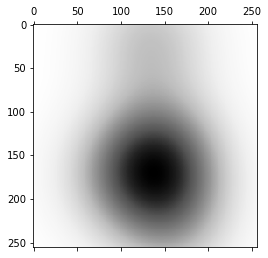

In [4]:
sigma_x = 50
sigma_y = 50
m = np.zeros((N, N))
for i in range(5):
    mu_x = np.random.randint(10, N - 10)
    mu_y = np.random.randint(10, N - 10)
    m += 1.0/(2.0*np.pi*sigma_x*sigma_y)*np.exp(-0.5*(x - mu_x)**2/(sigma_x**2) - 0.5*(y - mu_y)**2/(sigma_y**2))
m /= m.sum()
matshow(m, cmap=cm.Greys)

In [5]:
mu_x_ = np.sum(x*m)
mu_y_ = np.sum(y*m)
sigma_x_ = np.sqrt(np.sum((x - mu_x)**2*m))
sigma_y_ = np.sqrt(np.sum((y - mu_y)**2*m))

In [6]:
print mu_x_, mu_y_, sigma_x_, sigma_y_

135.671727483 147.241665314 54.5915015413 66.4593495425


In [7]:
mu_x

155

In [8]:
#loss:  loss+ \lambda*(\sigma_x +\sigma_y)

In [11]:
import keras as K
from keras import backend as k

In [ ]:
#之前的loss
smooth =1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_np(y_true,y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1.- dice_coef(y_true, y_pred)

In [17]:
#新的loss
y, x = np.mgrid[:224, :224]/224.0
def loss(y_true,y_pred,alpha):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    m = y_pred /K.sum(y_pred)
    mu_x_ = K.sum(x*m)
    mu_y_ = K.sum(y*m)
    sigma_x = K.sum((x - mu_x)**2*m)
    sigma_y = K.sum((y - mu_y)**2*m)
    loss = (2. * intersection ) / (K.sum(y_true_f) + K.sum(y_pred_f) ) +alpha*(sigma_x+sigma_y)

In [15]:
y = y/224.0

In [18]:
y

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00446429,  0.00446429,  0.00446429, ...,  0.00446429,
         0.00446429,  0.00446429],
       [ 0.00892857,  0.00892857,  0.00892857, ...,  0.00892857,
         0.00892857,  0.00892857],
       ..., 
       [ 0.98660714,  0.98660714,  0.98660714, ...,  0.98660714,
         0.98660714,  0.98660714],
       [ 0.99107143,  0.99107143,  0.99107143, ...,  0.99107143,
         0.99107143,  0.99107143],
       [ 0.99553571,  0.99553571,  0.99553571, ...,  0.99553571,
         0.99553571,  0.99553571]])